In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
gold = pd.read_csv('Gold_Price.csv')

In [3]:
gold

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,1672.800049,1693.800049,1670.000000,1687.900024,1687.900024,35
1,2013-01-03,1686.099976,1686.800049,1662.000000,1673.699951,1673.699951,140
2,2013-01-04,1647.000000,1658.300049,1625.699951,1648.099976,1648.099976,199
3,2013-01-07,1656.500000,1659.900024,1643.800049,1645.500000,1645.500000,49
4,2013-01-08,1647.699951,1661.500000,1647.699951,1661.500000,1661.500000,17
...,...,...,...,...,...,...,...
2668,2023-08-14,1909.300049,1912.599976,1903.300049,1910.599976,1910.599976,46
2669,2023-08-15,1906.000000,1907.699951,1895.000000,1902.500000,1902.500000,73
2670,2023-08-16,1904.500000,1904.500000,1890.300049,1896.099976,1896.099976,22
2671,2023-08-17,1893.699951,1902.400024,1884.000000,1884.099976,1884.099976,245


In [5]:
gold_price = gold[['Date','Close']]

In [5]:
gold_price

,Date,Close
0,2013-01-02,1687.900024
1,2013-01-03,1673.699951
2,2013-01-04,1648.099976
3,2013-01-07,1645.500000
4,2013-01-08,1661.500000
...,...,...
2668,2023-08-14,1910.599976
2669,2023-08-15,1902.500000
2670,2023-08-16,1896.099976
2671,2023-08-17,1884.099976


In [6]:
gold_price['Date'] = pd.to_datetime(gold_price['Date'])

In [7]:
gold_price.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

<Axes: >

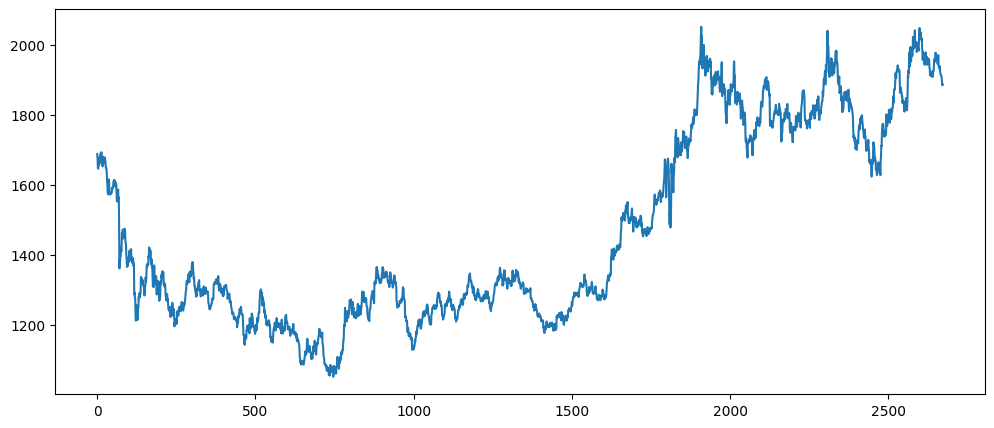

In [8]:
gold_price['Close'].plot(figsize=(12,5))

In [14]:
import pmdarima as pm

In [15]:
best_model = pm.auto_arima(gold_price['Close'],trace=True,suppress_warnings=True)
print(best_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22016.007, Time=2.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22015.214, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22013.871, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22013.827, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22013.280, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22015.798, Time=1.28 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.734 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2673
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -11005.640
Date:                Thu, 24 Aug 2023   AIC                          22013.280
Time:                        08:33:53   BIC                          22019.171
Sample:                             0   HQIC                         22015.412
    

In [16]:
gold_train=gold_price.head(1870)

In [17]:
gold_test = gold_price.tail(803)

In [19]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
model=ARIMA(gold_train['Close'],order=(0,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1870
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -7494.708
Date:                Thu, 24 Aug 2023   AIC                          14991.416
Time:                        08:41:44   BIC                          14996.949
Sample:                             0   HQIC                         14993.455
                               - 1870                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       178.0647      2.197     81.049      0.000     173.759     182.371
===================================================================================
Ljung-Box (L1) (Q):                   0.83   Jarque-Bera (JB):             11404.49
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.50
Prob(H) (two-sided):                  0.02   Kurtosis:                        15.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

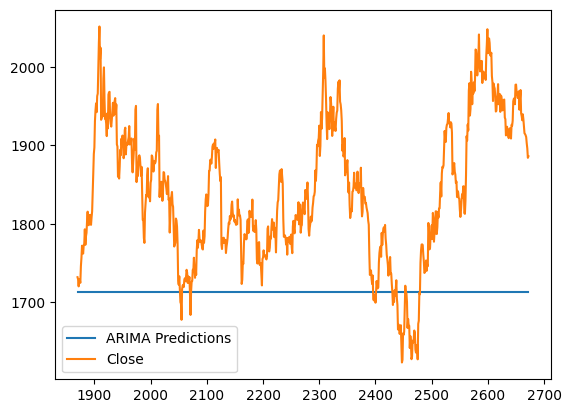

In [24]:
start=len(gold_train)
end=len(gold_train)+len(gold_test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
gold_test['Close'].plot(legend=True)

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt
gold_test['Close'].mean()
rmse=sqrt(mean_squared_error(pred,gold_test['Close']))
print(rmse)

154.92466275967428


In [27]:
model2=ARIMA(gold_price['Close'],order=(0,1,0))
model2=model2.fit()
gold_price.tail()

,Date,Close
2668,2023-08-14,1910.599976
2669,2023-08-15,1902.500000
2670,2023-08-16,1896.099976
2671,2023-08-17,1884.099976
2672,2023-08-18,1886.099976


In [29]:
index_future_dates=pd.date_range(start='2023-08-19',end='2023-09-18')
pred=model2.predict(start=len(gold_price),end=len(gold_price)+30,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2023-08-19    1886.099976
2023-08-20    1886.099976
2023-08-21    1886.099976
2023-08-22    1886.099976
2023-08-23    1886.099976
2023-08-24    1886.099976
2023-08-25    1886.099976
2023-08-26    1886.099976
2023-08-27    1886.099976
2023-08-28    1886.099976
2023-08-29    1886.099976
2023-08-30    1886.099976
2023-08-31    1886.099976
2023-09-01    1886.099976
2023-09-02    1886.099976
2023-09-03    1886.099976
2023-09-04    1886.099976
2023-09-05    1886.099976
2023-09-06    1886.099976
2023-09-07    1886.099976
2023-09-08    1886.099976
2023-09-09    1886.099976
2023-09-10    1886.099976
2023-09-11    1886.099976
2023-09-12    1886.099976
2023-09-13    1886.099976
2023-09-14    1886.099976
2023-09-15    1886.099976
2023-09-16    1886.099976
2023-09-17    1886.099976
2023-09-18    1886.099976
Freq: D, Name: ARIMA Predictions, dtype: float64
